In [21]:
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
digits = load_digits()

In [23]:
X, y = digits.data, digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ValueError: too many values to unpack (expected 5)

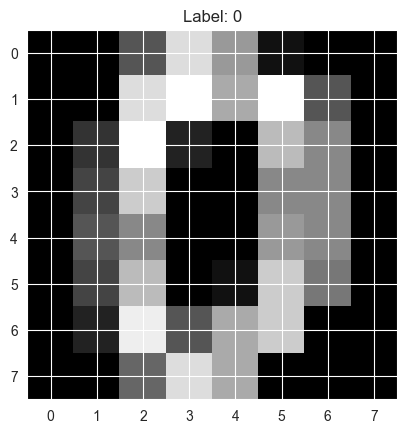

In [12]:
import matplotlib.pyplot as plt

digit_img = digits.images[0]
label = digits.target[0]

plt.imshow(digit_img, cmap='gray')
plt.title(f'Label: {label}')
plt.show()

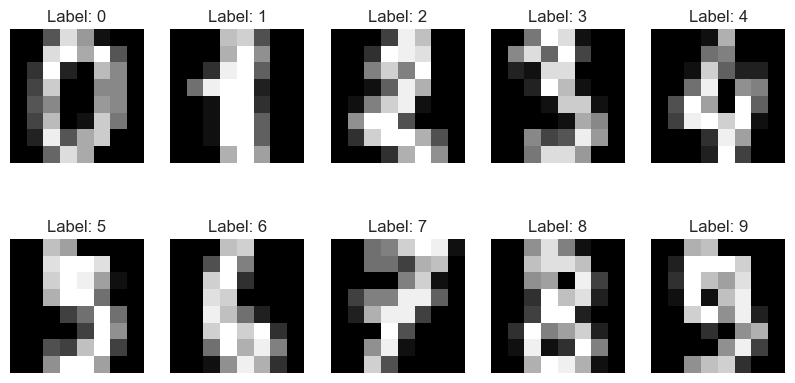

In [13]:
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='gray')
    ax.set_title(f"Label: {digits.target[i]}")
    ax.axis('off')
plt.show()

In [14]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(classification_report(y_test, knn.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        34
           4       0.98      1.00      0.99        46
           5       0.98      0.96      0.97        47
           6       0.97      1.00      0.99        35
           7       1.00      0.97      0.99        34
           8       1.00      1.00      1.00        30
           9       0.95      0.95      0.95        40

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



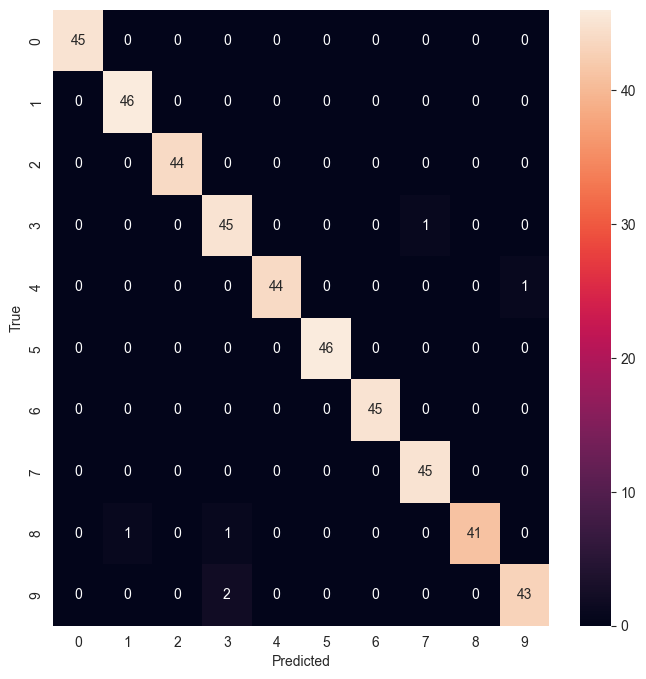

In [28]:
import seaborn as sns

conf_mat = confusion_matrix(y_test, knn.predict(X_test))
plt.figure(figsize=(8, 8))
sns.heatmap(conf_mat, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Found 5 errors out of 360 samples


NameError: name 'imgs_test' is not defined

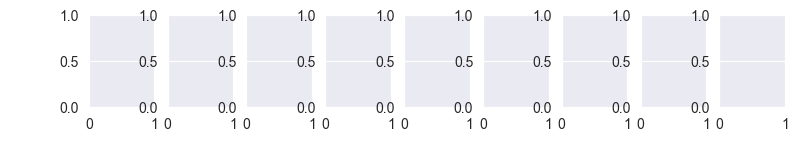

In [20]:
import numpy as np

pred = knn.predict(X_test)
wrong_idx = np.where(y_test != pred)[0]
print(f"Found {len(wrong_idx)} errors out of {len(y_test)} samples")

# limit how many to show
max_show = 20
wrong_idx = wrong_idx[:max_show]

rows = int(np.ceil(len(wrong_idx) / 10))
fig, axes = plt.subplots(rows, 10, figsize=(10, rows*1.2))
axes = np.atleast_2d(axes)

for j, ax in enumerate(axes.flat):
    ax.axis("off")
    if j < len(wrong_idx):
        i = wrong_idx[j]
        ax.imshow(imgs_test[i])
        ax.set_title(f"pred {pred[i]} / true {y_test[i]}", fontsize=8)

plt.tight_layout()
plt.show()